<h1>Nama : Deny Sulistiyo</h1>
<h1>NIM : 09011281823030</h1>

<h1>Case Description</h1>

<p>Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.</p>
<p>This case is about prediction of customer churn for a bank using  machine learning artificial neural networks.</p>
Source : https://github.com/rishchou/customer_churn_machine_learning/blob/master/ann.py

<h1>Library Description</h1>
<ul>
    <li>Pandas : Is python library that focused on analytical data like data manipulation and data cleaning.</li>
    <li>NumPy : Is python library that focused on scientific computing. NumPy can have make N-Dimentional array object.</li>
    <li>Matplotlib : Is python library that focused on data visualization like making graphic plot.</li>
</ul>

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values #Split for attribute
y = dataset.iloc[:, 13].values #Split fot label
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<h1>One Hot Encoder</h1>
<p>One hot encoder is a process by which categorical variables are converted into a form that could be provided to Machine Learning algorithms to do a better job in prediction. </p>
<h1>Label Encoder</h1>
<p>Label Encoder is a process that converting the labels into numeric form so as to convert it into the machine-readable form.</p>

In [2]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [7]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

ct = ColumnTransformer(
    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],   
    # Leave the rest of the columns untouched
    remainder='passthrough'                                         
)
X = ct.fit_transform(X)

X = X[:, 1:]

<h1>Splitting Data</h1>
<p>To train a Machine Learning model, we must split the datasets into the training set and testing set. Because if we want to predict the accuracy data, we can use the testing data. But the traing data we can use for making the Machine Learning model.</p>

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# For the test is using 20% from all of data

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
#Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
# For this layer using 6 nodes
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
# For this layer using 6 nodes
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
# For this layer using 1 nodes
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)
# Using 20 epochs

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8000/8000 [==============================] - 7s 873us/step - loss: 0.4790 - acc: 0.7957 14s - loss: 0.6183
Epoch 2/20
8000/8000 [==============================] - 2s 231us/step - loss: 0.4283 - acc: 0.7960
Epoch 3/20
8000/8000 [==============================] - 2s 207us/step - loss: 0.4227 - acc: 0.8010
Epoch 4/20
8000/8000 [==============================] - 2s 210us/step - loss: 0.4187 - acc: 0.8210
Epoch 5/20
8000/8000 [==============================] - 2s 207us/step - loss: 0.4164 - acc: 0.8251
Epoch 6/20
8000/8000 [==============================] - 2s 211us/step - loss: 0.4148 - acc: 0.8265
Epoch 7/20
8000/8000 [==============================] - 2s 211us/step - loss: 0.4133 - acc: 0.8314
Epoch 8/20
8000/8000 [==============================] - 2s 220us/step - loss: 0.4122 - acc: 0.8315
Epoch 9/20
8000/8000 [==============================] - 2s 208us/step - loss: 0.4111 - acc: 0.8329
Epoch 10/20
8000/8000 [===================

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [14]:
# Predicting a single new observation

# Predict if the customer with the following informations will leave the bank:
# Geography: France
# Credit Score: 600
# Gender: Male
# Age: 40
# Tenure: 3
# Balance: 60000
# Number of Products: 2
# Has Credit Card: Yes
# Is Active Member: Yes
# Estimated Salary: 50000

new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

In [4]:
#Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [15]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

<h1>Result Screenshoot</h1>

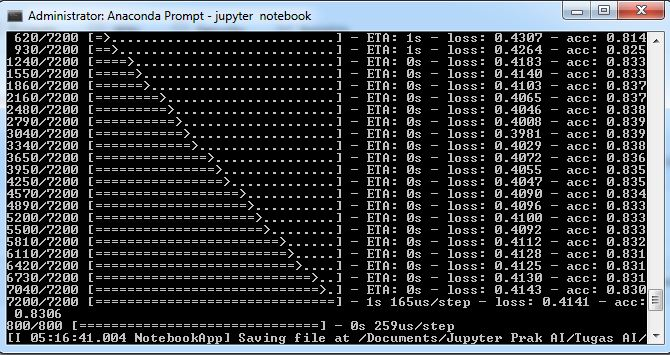

In [5]:
#Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [16]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [5, 10],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/5
7200/7200 [==============================] - 1s 183us/step - loss: 0.5562 - acc: 0.7969
Epoch 2/5
7200/7200 [==============================] - 1s 84us/step - loss: 0.4345 - acc: 0.7971
Epoch 3/5
7200/7200 [==============================] - 1s 91us/step - loss: 0.4281 - acc: 0.7971
Epoch 4/5
7200/7200 [==============================] - 1s 99us/step - loss: 0.4225 - acc: 0.7999: 0s - loss: 0.4348 - a
Epoch 5/5
7200/7200 [==============================] - 1s 95us/step - loss: 0.4168 - acc: 0.8236
Epoch 1/5
7200/7200 [==============================] - 1s 182us/step - loss: 0.5553 - acc: 0.7954
Epoch 2/5
7200/7200 [==============================] - 1s 109us/step - loss: 0.4358 - acc: 0.7967 0s - loss: 0.4339 -
Epoch 3/5
7200/7200 [==============================] - 1s 106us/step - loss: 0.4301 - acc: 0.7967
Epoch 4/5
7200/7200 [==============================] - 1s 109us/step - loss: 0.4276 - acc: 0.7967
Epoch 5/5
7200/7200 [==============================] - 1s 114us/step - loss: 0.

7200/7200 [==============================] - 1s 168us/step - loss: 0.4196 - acc: 0.8110
Epoch 6/10
7200/7200 [==============================] - 1s 134us/step - loss: 0.4157 - acc: 0.8279
Epoch 7/10
7200/7200 [==============================] - 1s 132us/step - loss: 0.4123 - acc: 0.8315
Epoch 8/10
7200/7200 [==============================] - 1s 145us/step - loss: 0.4095 - acc: 0.8340
Epoch 9/10
7200/7200 [==============================] - 1s 136us/step - loss: 0.4074 - acc: 0.8343
Epoch 10/10
7200/7200 [==============================] - 1s 138us/step - loss: 0.4056 - acc: 0.8343
Epoch 1/10
7200/7200 [==============================] - 3s 420us/step - loss: 0.5560 - acc: 0.7951
Epoch 2/10
7200/7200 [==============================] - 1s 134us/step - loss: 0.4301 - acc: 0.7975
Epoch 3/10
7200/7200 [==============================] - 1s 133us/step - loss: 0.4143 - acc: 0.8086
Epoch 4/10
7200/7200 [==============================] - 1s 133us/step - loss: 0.3994 - acc: 0.8158
Epoch 5/10
7200/7200

7200/7200 [==============================] - 1s 135us/step - loss: 0.4247 - acc: 0.7944
Epoch 5/5
7200/7200 [==============================] - 1s 111us/step - loss: 0.4210 - acc: 0.8046 0s - loss: 0.4242 - acc: 0.7 - ETA: 0s - loss: 0.4265 - acc: 0.791 - ETA: 0s - loss: 0.4256 - acc: 0
Epoch 1/5
7200/7200 [==============================] - 4s 556us/step - loss: 0.5925 - acc: 0.7958
Epoch 2/5
7200/7200 [==============================] - 1s 118us/step - loss: 0.4400 - acc: 0.7969
Epoch 3/5
7200/7200 [==============================] - 1s 120us/step - loss: 0.4315 - acc: 0.7969
Epoch 4/5
7200/7200 [==============================] - 1s 120us/step - loss: 0.4284 - acc: 0.7969
Epoch 5/5
7200/7200 [==============================] - 1s 119us/step - loss: 0.4258 - acc: 0.7969
Epoch 1/5
7200/7200 [==============================] - 4s 569us/step - loss: 0.5799 - acc: 0.7953
Epoch 2/5
7200/7200 [==============================] - 1s 125us/step - loss: 0.4373 - acc: 0.7971
Epoch 3/5
7200/7200 [======

7200/7200 [==============================] - 6s 766us/step - loss: 0.6320 - acc: 0.7936
Epoch 2/10
7200/7200 [==============================] - 1s 181us/step - loss: 0.4577 - acc: 0.7967
Epoch 3/10
7200/7200 [==============================] - 1s 175us/step - loss: 0.4325 - acc: 0.7967
Epoch 4/10
7200/7200 [==============================] - 1s 185us/step - loss: 0.4289 - acc: 0.7967
Epoch 5/10
7200/7200 [==============================] - 1s 198us/step - loss: 0.4269 - acc: 0.7967
Epoch 6/10
7200/7200 [==============================] - 1s 191us/step - loss: 0.4255 - acc: 0.7967
Epoch 7/10
7200/7200 [==============================] - 1s 189us/step - loss: 0.4241 - acc: 0.7967
Epoch 8/10
7200/7200 [==============================] - 1s 175us/step - loss: 0.4220 - acc: 0.8168
Epoch 9/10
7200/7200 [==============================] - 1s 195us/step - loss: 0.4198 - acc: 0.8224
Epoch 10/10
7200/7200 [==============================] - 1s 189us/step - loss: 0.4168 - acc: 0.8268
Epoch 1/10
7200/7200

7200/7200 [==============================] - 1s 133us/step - loss: 0.4296 - acc: 0.7962
Epoch 5/10
7200/7200 [==============================] - 1s 148us/step - loss: 0.4261 - acc: 0.7962
Epoch 6/10
7200/7200 [==============================] - 1s 159us/step - loss: 0.4228 - acc: 0.7962
Epoch 7/10
7200/7200 [==============================] - 1s 149us/step - loss: 0.4198 - acc: 0.8015
Epoch 8/10
7200/7200 [==============================] - 1s 150us/step - loss: 0.4175 - acc: 0.8189
Epoch 9/10
7200/7200 [==============================] - 1s 152us/step - loss: 0.4158 - acc: 0.8247
Epoch 10/10
7200/7200 [==============================] - 1s 147us/step - loss: 0.4145 - acc: 0.8256
Epoch 1/10
7200/7200 [==============================] - 6s 859us/step - loss: 0.6253 - acc: 0.7935
Epoch 2/10
7200/7200 [==============================] - 1s 148us/step - loss: 0.4649 - acc: 0.7957
Epoch 3/10
7200/7200 [==============================] - 1s 153us/step - loss: 0.4349 - acc: 0.7957
Epoch 4/10
7200/7200

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[1560,   35],
       [ 278,  127]], dtype=int64)

In [22]:
#Show the Accuracy Score
accuracy_score(y_test, y_pred)

0.8435

<p>Based on the accuracy score above, the accuracy score is 84%</p>